# Introduction
Hi, this is Zihan Wan here with Janhavi Swapnil Patil.  
Assignment team num: Team 14

# Question

Find a simple one-humped dataset and model it by matching one of the pdfs we learned about today. Find the most likely parameters of your pdf using MOM. Use the model to do a prediction.

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats.distributions import gamma

### These are the properties of the lump of breast cancer patients

In [2]:
# load the dataset
data = pd.read_csv("../../data/breast_cancer.csv", index_col=0, na_values='NA')
data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


### Let's draw a **histogram** of the data

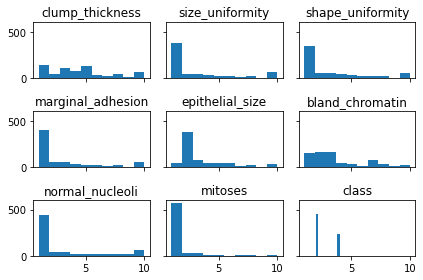

In [3]:
# histogram of each column
data.hist(sharex=True, sharey=True, grid=False, bins=10)
plt.tight_layout()

### Then we select 'epithelial_size' column since it's one-humped

[]

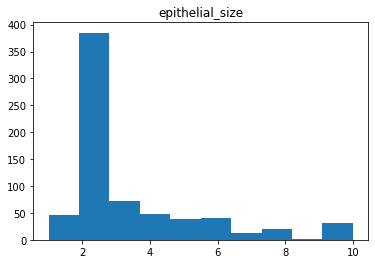

In [4]:
# histogram of epithelial_size column
es = pd.read_csv("../../data/breast_cancer.csv",na_values='NA',usecols=['epithelial_size'])
es.hist(grid=False, bins=10)
plt.plot()

### Now, let's calculate the sample ***moments of interest***: the **means** and **variances**

In [5]:
# mean of epithelial size
es_mean = es.mean()
es_mean

epithelial_size    3.213773
dtype: float64

In [6]:
# variance of epithelial size
es_var = es.var()
es_var

epithelial_size    4.903948
dtype: float64

### We then use these moments to estimate $\alpha$ and $\beta$ 

In [7]:
# calculate alpha and beta according to formaula
alpha_mom = es_mean ** 2 / es_var
beta_mom = es_var / es_mean
alpha_mom, beta_mom

(epithelial_size    2.106127
 dtype: float64,
 epithelial_size    1.525916
 dtype: float64)

### Then, plot the distributions implied by the calculated alphas and betas. 

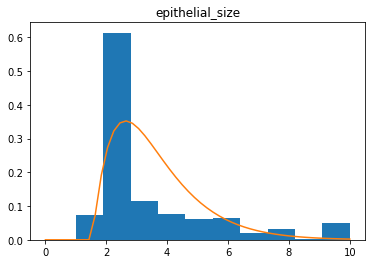

In [8]:
# plot histogram and gamma pdf
es.hist(density=True, bins=10,grid=False)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

As can be seen from the graph, the epithelial size of most breast cancer patients is around 2-3. And the epithelial size ranges from 1 to 10.